In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


**DATA CLEANING**

In [20]:
## --- AIR-PASSENGERS IN INDIA ---

Air_passenger = pd.read_csv('/content/final_air_paseenger.csv')
Air_passenger.head()

#renaming of column
Air_passenger.rename(columns = {'Country Name':'YEAR'},inplace = True)
Air_passenger.rename(columns = {'India':'Passengers'},inplace = True)

#slicing of desire data
df_Air_passenger = Air_passenger[3:].dropna()
df_Air_passenger = df_Air_passenger[-21:-1]
print(df_Air_passenger)

    YEAR   Passengers
44  2001     16862737
45  2002     17633019
46  2003     19455085
47  2004     23934074
48  2005     27879461
49  2006     40288794
50  2007     51897450
51  2008     49877935
52  2009     54446373
53  2010   64374253.8
54  2011     73996912
55  2012  72151828.89
56  2013     75589071
57  2014  82718882.88
58  2015     98927860
59  2016    119577835
60  2017    139752424
61  2018  164035637.5
62  2019    167499116
63  2020     68959633


In [21]:
## --- RAIL-PASSENGERS IN INDIA ---

Rail_passenger = pd.read_csv('/content/final_rail_transport.csv')
Rail_passenger.head(25)

#renaming of column
Rail_passenger.drop(Rail_passenger.columns[[1]],axis=1,inplace=True)
Rail_passenger.rename(columns = {'Railways, passengers carried (million passenger-km)':'Passengers(million passenger-km)'},inplace = True)
Rail_passenger.rename(columns = {'Series Name':'YEAR'},inplace = True)

#slicing of desire data
df_Rail_passenger = Rail_passenger[-22:-2]
df_Rail_passenger



,YEAR,Passengers(million passenger-km)
4,2001,457022
5,2002,493489
6,2003,515044
7,2004,541208
8,2005,575702
9,2006,615634
10,2007,694764
11,2008,769956
12,2009,838032
13,2010,903465


In [22]:
## --- TOTAL INDIAN PASSENGER (AIR-TRAIN) ---

# -- sum of passenger of air and train
Total_passenger = []

for i,j in zip(df_Rail_passenger['Passengers(million passenger-km)'],df_Air_passenger['Passengers']):
    Total = float(i)+float(j)
    Total_passenger.append(Total)



Total_ind_passenger = pd.DataFrame(Total_passenger,columns=['Indian Total Passengers'])
Total_ind_passenger

Total_ind_passenger.insert(0,'YEAR',list(df_Rail_passenger['YEAR']),True)

Total_ind_passenger.insert(1,'RAIL-PASSENGER (million passenger-km)',list(df_Rail_passenger['Passengers(million passenger-km)']),True)
Total_ind_passenger.insert(2,'AIR-PASSENGER',list(df_Air_passenger['Passengers']),True)


Total_ind_passenger

,YEAR,RAIL-PASSENGER (million passenger-km),AIR-PASSENGER,Indian Total Passengers
0,2001,457022,16862737,1.731976e+07
1,2002,493489,17633019,1.812651e+07
2,2003,515044,19455085,1.997013e+07
3,2004,541208,23934074,2.447528e+07
4,2005,575702,27879461,2.845516e+07
5,2006,615634,40288794,4.090443e+07
6,2007,694764,51897450,5.259221e+07
7,2008,769956,49877935,5.064789e+07
8,2009,838032,54446373,5.528440e+07
9,2010,903465,64374253.8,6.527772e+07


In [23]:
## --- INTERNATIONAL TOURISTS ---

Int_Tourist = pd.read_csv('/content/final_int_pass_arrivals_departure.csv')
Int_Tourist.head()

#renaming of column
Int_Tourist.rename(columns = {'Series Name':'YEAR'},inplace = True)
Int_Tourist.rename(columns = {'International tourism, number of arrivals':'Arrivals of Int Tourist'},inplace = True)
Int_Tourist.rename(columns = {'International tourism, number of departures':'Departures'},inplace = True)

#slicing of desire data
df_Int_Tourist = Int_Tourist[-21:-1]

df_Int_Tourist

,YEAR,Arrivals of Int Tourist,Departures
4,2001,2537000,4564000
5,2002,2384000,4940000
6,2003,2726000,5351000
7,2004,3457000,6213000
8,2005,3919000,7185000
9,2006,4447000,8340000
10,2007,5082000,9783000
11,2008,5283000,10868000
12,2009,5168000,11067000
13,2010,5776000,12988000


In [24]:
## --- DOMESTIC TOURISTS ---

Domestic = pd.read_csv('/content/final_domestic_tourist.csv')
Domestic.head()

#renaming of column
Domestic.rename(columns={'Number of domestic tourist visits in India from 2000 to 2022(in millions)':'Domestic-Tourist'},inplace=True)
Domestic['Domestic-Tourist'] = Domestic['Domestic-Tourist']*1000000
# #slicing of desire data
Domestic_Tourist = Domestic[-22:-2]
Domestic_Tourist


,year,Domestic-Tourist
1,2001,2.364700e+08
2,2002,2.696000e+08
3,2003,3.090400e+08
4,2004,3.662700e+08
5,2005,3.919500e+08
6,2006,4.623100e+08
7,2007,5.264300e+08
8,2008,5.630300e+08
9,2009,6.688000e+08
10,2010,7.477000e+08


In [25]:
## Total Passenger of INDIA (-- sum of Int And Domestic Tourist)
Total_tourist = []

for i,j in zip(df_Int_Tourist['Arrivals of Int Tourist'],Domestic_Tourist['Domestic-Tourist']):
    Total = float(i)+float(j)
    Total_tourist.append(Total)

#------------------------------------------------------------------------------#

# Total_ind_pass = pd.DataFrame({'Indian Passengers':Total_pass})
# Total_ind_pass

# -- New Data Frame
Total_ind_tourist = pd.DataFrame(Total_tourist,columns=['Indian Total Tourist'])

# -- Adding Year
Total_ind_tourist.insert(0,'YEAR',list(Domestic_Tourist['year']),True)

# Adding International And Domestic Passenger columns
Total_ind_tourist.insert(1,'Domestic-Tourist',list(Domestic_Tourist['Domestic-Tourist']),True)
Total_ind_tourist.insert(2,'Arrivals of Int Tourist',list(df_Int_Tourist['Arrivals of Int Tourist']),True)


Total_ind_tourist


,YEAR,Domestic-Tourist,Arrivals of Int Tourist,Indian Total Tourist
0,2001,2.364700e+08,2537000,2.390070e+08
1,2002,2.696000e+08,2384000,2.719840e+08
2,2003,3.090400e+08,2726000,3.117660e+08
3,2004,3.662700e+08,3457000,3.697270e+08
4,2005,3.919500e+08,3919000,3.958690e+08
5,2006,4.623100e+08,4447000,4.667570e+08
6,2007,5.264300e+08,5082000,5.315120e+08
7,2008,5.630300e+08,5283000,5.683130e+08
8,2009,6.688000e+08,5168000,6.739680e+08
9,2010,7.477000e+08,5776000,7.534760e+08


In [26]:
## --- INDIAN GDP BY TOURISUM SECTOR --

Tour_Gdp = pd.read_csv('/content/final_gdp.csv')

Tour_Gdp['GDP BY TOURISUM(IN BILLION)'] = (Tour_Gdp['Indian GDP (in billion)']*Tour_Gdp['Total contribution of travel and tourism to GDP in India from 2000 to 2021 (in %)'])/100

Tour_Gdp.rename(columns={'Total contribution of travel and tourism to GDP in India from 2000 to 2021 (in %)':'GDP BY TOURISUM (in %)'},inplace=True)

Tour_Gdp


,year,GDP BY TOURISUM (in %),Indian GDP (in billion),GDP BY TOURISUM(IN BILLION)
0,2000,2.65,468.30,12.409950
1,2001,2.54,485.44,12.330176
2,2002,2.38,514.94,12.255572
3,2003,2.73,607.70,16.590210
4,2004,3.46,709.15,24.536590
5,2005,3.92,820.38,32.158896
6,2006,4.45,940.26,41.841570
7,2007,5.08,1216.74,61.810392
8,2008,5.28,1198.90,63.301920
9,2009,5.17,1341.89,69.375713


In [27]:
## --- INDIAN FEE (FORIGEN EXCHANGE EARINGS)

Ind_fee = pd.read_csv('/content/ind_fee.csv')
Ind_fee

,Year,FEE from Tourism in India\n(in US $ million),Percentage(%) change\nover the previous year
0,2001,3198,-7.6
1,2002,3103,-3.0
2,2003,4463,43.8
3,2004,6170,38.2
4,2005,7493,21.4
5,2006,8634,15.2
6,2007,10729,24.3
7,2008,11832,10.3
8,2009,11136,-5.9
9,2010,14490,30.1


In [28]:
## --- STATS WISE DOMESTIC TOURIST (2020) ---

stats_2020 = pd.read_csv('/content/stat_tourist_2020.csv')

stats_2020.rename(columns = {'States/Uts':'STATES'},inplace = True)
stats_2020.rename(columns = {'Domestic\nTourist\nVisits':'DOMESTIC TOURISTS'},inplace = True)
stats_2020.rename(columns = {'Foreign\nTourist\nVisits':'FOREIGN TOURISTS'},inplace = True)

stats_2020['TOTAL TOURIST'] = stats_2020['DOMESTIC TOURISTS'] + stats_2020['FOREIGN TOURISTS']

stats_2020


,STATES,DOMESTIC TOURISTS,FOREIGN TOURISTS,TOTAL TOURIST
0,Andaman and Nicobar Islands,191207,5412.0,196619.0
1,Andhra Pradesh,70828590,67591.0,70896181.0
2,Arunachal Pradesh,42871,961.0,43832.0
3,Assam,1266898,7285.0,1274183.0
4,Bihar,5638024,308080.0,5946104.0
5,Chandigarh,417953,12218.0,430171.0
6,Chhattisgarh,2810227,2322.0,2812549.0
7,Dadra and Nagar Haveli,104959,222.0,105181.0
8,Daman and Diu,297436,1382.0,298818.0
9,Delhi,9583671,681230.0,10264901.0


In [29]:
## --- INDIA SHAPE FILE ---

ind_poly = r'/content/india-polygon.shp'
ind_poly_DF = gpd.read_file(ind_poly)
ind_poly_DF_copy = gpd.read_file(ind_poly)
ind_poly_DF.head()

ind_poly_DF.drop(ind_poly_DF.columns[[0]],axis=1,inplace=True)

# ind_poly_DF.rename(columns = {'st_nm':'STATS'},inplace =True)

ind_poly_DF

,st_nm,geometry
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [30]:
#Merging the data
New_merged = ind_poly_DF.set_index('st_nm').join(stats_2020.set_index('STATES'))


New_merged

,geometry,DOMESTIC TOURISTS,FOREIGN TOURISTS,TOTAL TOURIST
st_nm,,,,
Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",191207,5412.0,196619.0
Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",42871,961.0,43832.0
Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",1266898,7285.0,1274183.0
Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",5638024,308080.0,5946104.0
Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",417953,12218.0,430171.0
Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",2810227,2322.0,2812549.0
Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695...",104959,222.0,105181.0
Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",297436,1382.0,298818.0
Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",3258715,302751.0,3561466.0


<Axes: title={'center': 'FOREIGN TOURISTS In INDIA'}>

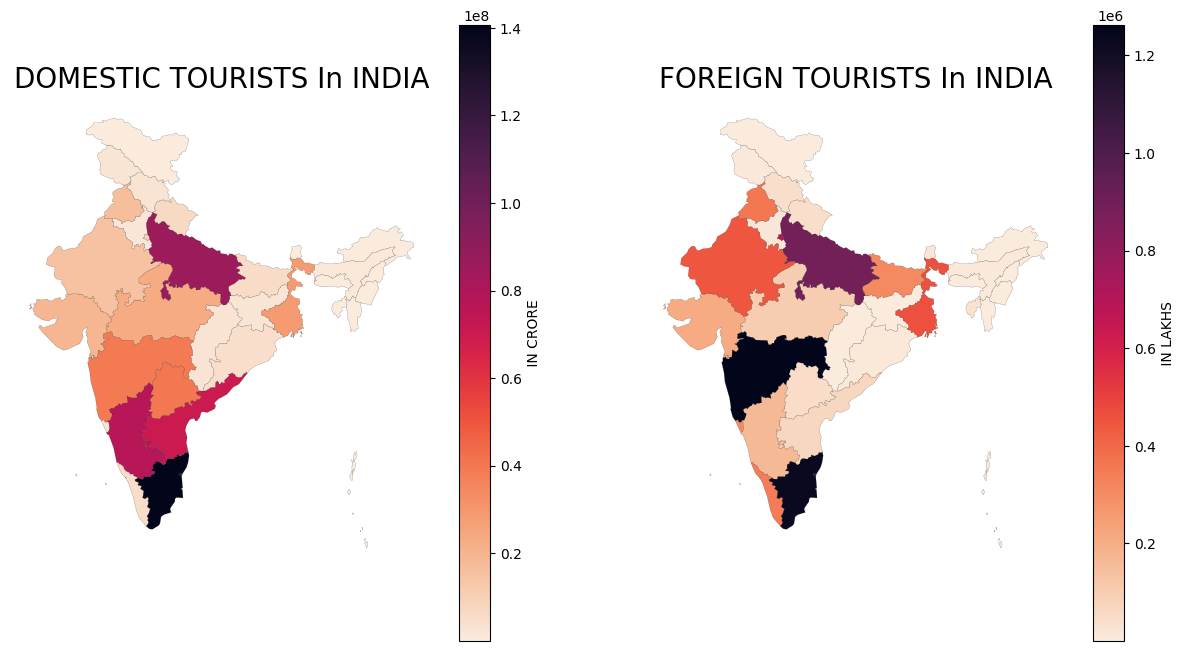

In [31]:
#Create figure and axes for Matplotlib and set the title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.axis('off')
ax1.set_title('DOMESTIC TOURISTS In INDIA', fontdict={'fontsize': '20', 'fontweight': '10'})
# Plot the figure -- domestic
New_merged.plot(column='DOMESTIC TOURISTS', cmap='rocket_r', linewidth=0.1, ax=ax1, edgecolor='0', legend=True, legend_kwds={'label': " IN CRORE "})

ax2.axis('off')
ax2.set_title('FOREIGN TOURISTS In INDIA', fontdict={'fontsize': '20', 'fontweight': '10'})
New_merged.plot(column='FOREIGN TOURISTS', cmap='rocket_r', linewidth=0.1, ax=ax2, edgecolor='0', legend=True, legend_kwds={'label': " IN LAKHS "})


In [32]:
## --- COUNTRY WISE FTAs ARRIVALS IN INDIA 2020 ---

Country_2020 = pd.read_csv('/content/country_FTAs_2020.csv')

Country_2020




,Source Country,FTAs,Percentage (%) Share
0,BANGLADESH,549273,20.01
1,UNITED STATES,394092,14.36
2,UNITED KINGDOM,291874,10.63
3,CANADA,122868,4.48
4,RUSSIAN FEDERATION,102166,3.72
5,AUSTRALIA,86758,3.16
6,FRANCE,74243,2.70
7,GERMANY,72558,2.64
8,MALAYSIA,69897,2.55
9,SRI LANKA,68646,2.50


In [33]:
import plotly.graph_objects as go

labels = list(Country_2020['Source Country'])
values = list(Country_2020['Percentage (%) Share'])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01])])
fig.update_layout(width=800, height=600)
fig.update_layout(legend=dict(title='Source Countries'), title='Share of Top Countries in International Tourism Receipts')
fig.update_layout(title_font=dict(size=20))
fig.update_traces(textinfo='label+percent')
fig.show()

In [34]:
import plotly.graph_objects as go

# Replace placeholders with your actual data
countries = list(Country_2020['Source Country'])
receipts = list(Country_2020['Percentage (%) Share'])

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=countries, y=receipts)])
fig.update_layout(
    title="Share of Top Countries in International Tourism Receipts",
    annotations=[dict(text=f"%{percent:.1f}", x=x, y=y) for percent, x, y in zip(fig.data[0].y, fig.data[0].x, fig.data[0].y)]
)

# Display the chart
fig.show()

**ANALYSIS**

**1. Estimates of Foreign Exchange Earnings from Tourism in India 2001-2020**

<Figure size 640x480 with 0 Axes>

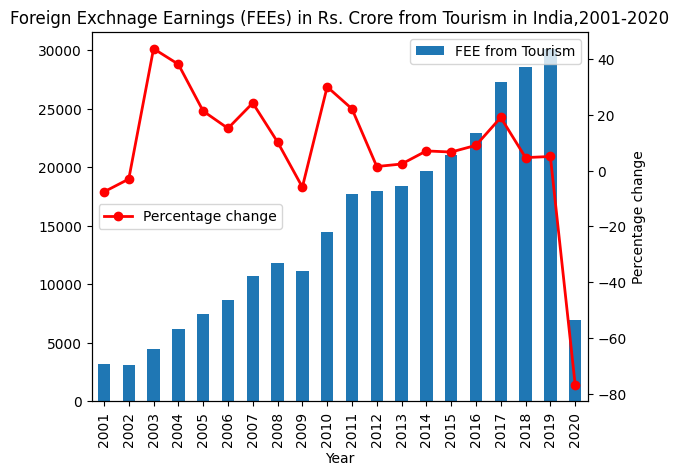

In [35]:

fig = plt.figure()

ax = Ind_fee[['Year',"FEE from Tourism in India\n(in US $ million)"]].plot(kind='bar',use_index=True,x='Year',y='FEE from Tourism in India\n(in US $ million)')
ax2 = ax.twinx()
ax2.plot(Ind_fee[["Percentage(%) change\nover the previous year"]].values,linestyle='-',marker='o',linewidth=2.0,color='red')
ax.legend(["FEE from Tourism"],loc=1)
plt.legend(["Percentage change",],loc=6)
plt.ylabel('Percentage change')
plt.title('Foreign Exchnage Earnings (FEEs) in Rs. Crore from Tourism in India,2001-2020')


plt.show()


**2. HOW AFFECTS TOURISUM GDP TO INDIAN ECONOMY(INDIAN OVERALL GDP)**

In [36]:
import plotly.express as px

fig = px.line(Tour_Gdp,x=Tour_Gdp['year'], y=Tour_Gdp['GDP BY TOURISUM(IN BILLION)'], text="GDP BY TOURISUM (in %)")
fig.update_traces(textposition="bottom right")
fig.update_layout(legend=dict(title='GDP BY TOURISUM (in %)'))
fig.show()

**3. RELATION BETWEEN TOURISUM GDP & INDIAN ECONOMY(INDIAN OVERALL GDP)**

In [37]:
import plotly.express as px

# Create a line chart
fig = px.line(Tour_Gdp, x='year', y=Tour_Gdp.columns[2:], labels={'value': 'GDP(IN BILLIN $)'}, title='RELATION BETWEEN TOURISUM GDP & INDIAN ECONOMY(INDIAN OVERALL GDP)', markers=True)
fig.update_layout(title_font=dict(size=20))
# fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.show()
# Show the plot

**INTERNATIONAL TOURIST VS INTERNATIONAL PASSENGER ARRIVALS**

In [38]:
Tour_Gdp

,year,GDP BY TOURISUM (in %),Indian GDP (in billion),GDP BY TOURISUM(IN BILLION)
0,2000,2.65,468.30,12.409950
1,2001,2.54,485.44,12.330176
2,2002,2.38,514.94,12.255572
3,2003,2.73,607.70,16.590210
4,2004,3.46,709.15,24.536590
5,2005,3.92,820.38,32.158896
6,2006,4.45,940.26,41.841570
7,2007,5.08,1216.74,61.810392
8,2008,5.28,1198.90,63.301920
9,2009,5.17,1341.89,69.375713


In [39]:
new = pd.concat([Total_ind_passenger,Total_ind_tourist],axis=1)

new.head()

,YEAR,RAIL-PASSENGER (million passenger-km),AIR-PASSENGER,Indian Total Passengers,YEAR,Domestic-Tourist,Arrivals of Int Tourist,Indian Total Tourist
0,2001,457022,16862737,17319759.0,2001,236470000.0,2537000,239007000.0
1,2002,493489,17633019,18126508.0,2002,269600000.0,2384000,271984000.0
2,2003,515044,19455085,19970129.0,2003,309040000.0,2726000,311766000.0
3,2004,541208,23934074,24475282.0,2004,366270000.0,3457000,369727000.0
4,2005,575702,27879461,28455163.0,2005,391950000.0,3919000,395869000.0


<Axes: xlabel='RAIL-PASSENGER (million passenger-km)', ylabel='Density'>

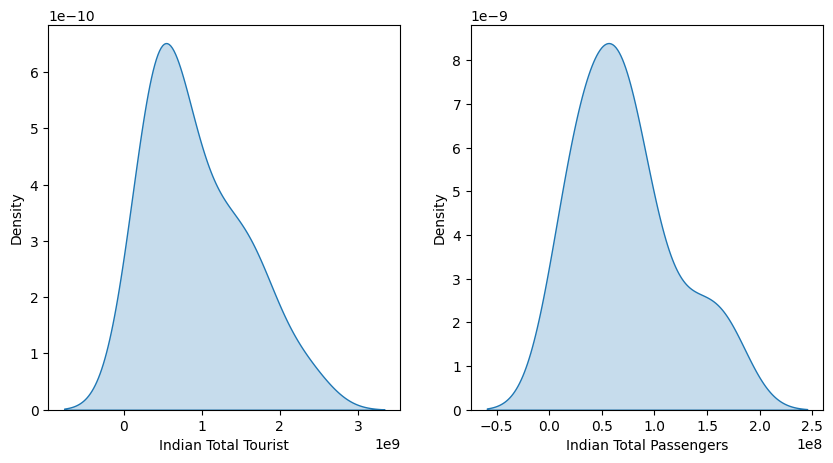

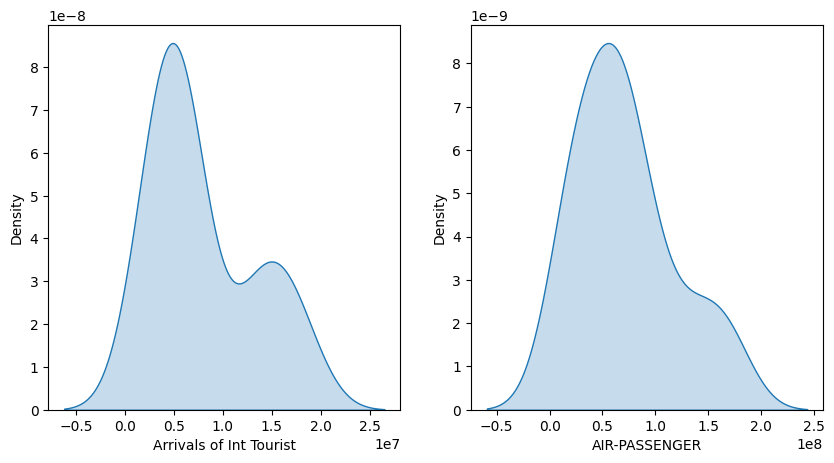

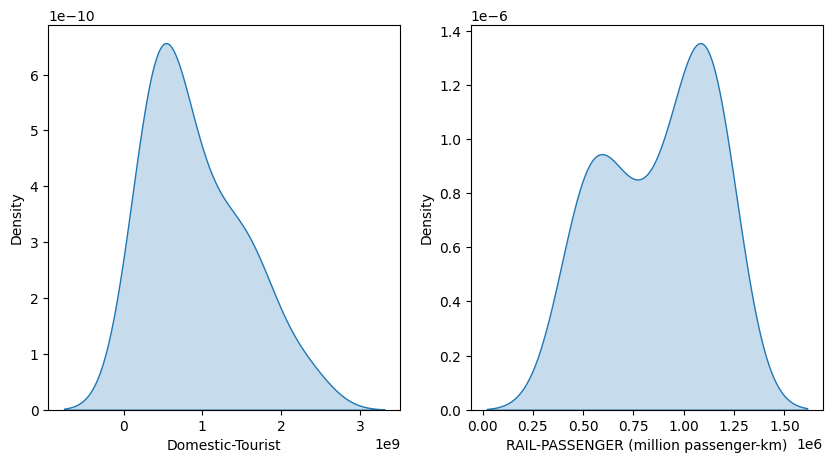

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

sns.kdeplot(data=new, x="Indian Total Tourist", fill=True, ax=ax1)
sns.kdeplot(data=new, x="Indian Total Passengers", fill=True, ax=ax2)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(10,5))

sns.kdeplot(data=new, x=new['Arrivals of Int Tourist'].astype('float'), fill=True, ax=ax3)
sns.kdeplot(data=new, x=new['AIR-PASSENGER'].astype('float'), fill=True, ax=ax4)

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(10,5))

sns.kdeplot(data=new, x=new['Domestic-Tourist'].astype('float'), fill=True, ax=ax5)
sns.kdeplot(data=new, x=new['RAIL-PASSENGER (million passenger-km)'].astype('float'), fill=True, ax=ax6)